# Experiment 1                              
# Talluri Surya Teja (15EE35028)

## libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Image read

In [2]:
img = cv2.imread('download.jpg')

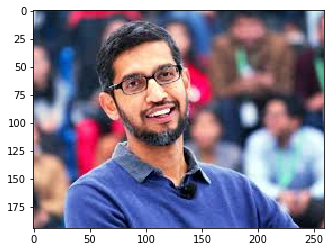

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Grayscale conversion

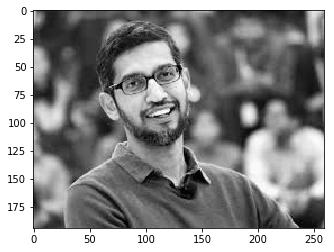

In [4]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_grey, cv2.COLOR_BGR2RGB))

## Blurring image(Low pass)

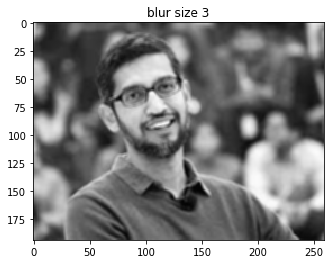

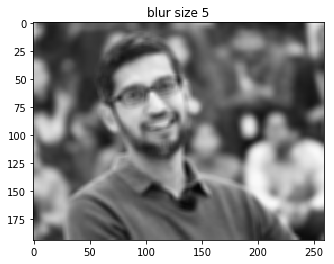

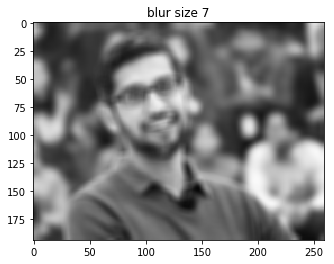

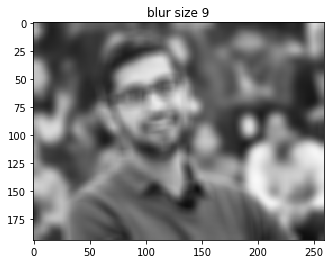

In [5]:
for i in range(3,10,2):
    kernel = np.ones((i,i),np.float32)/(i**2)
    temp = cv2.filter2D(img_grey,-1,kernel)
    plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
    plt.title('blur size '+str(i))
    plt.show()

## Edge Detection

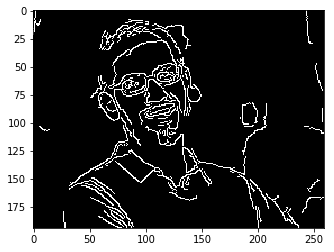

In [6]:
edge = cv2.Canny(img_grey, 150, 300)
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

## Salt and Pepper Noise

- Image pixel values are replaced by corrupted pixel values either maximum ‘or’ minimum pixel value i.e., 255 ‘or’ 0 respectively, if number of bits are 8 for transmission. 

In [7]:
def salt_pepper(image, amount):
    row,col,ch = image.shape
    sp = 0.5
    out = np.copy(image)
    # Generate Salt '0' noise
    num_salt = np.ceil(amount * image.size * sp)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 255
    # Generate Pepper '0' noise
    num_pepper = np.ceil(amount* image.size * (1. - sp))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


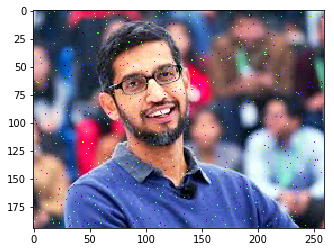

In [8]:
sp_im = salt_pepper(img, 0.01)
plt.imshow(cv2.cvtColor(sp_im, cv2.COLOR_BGR2RGB))

## Removing of Noise

- Median Blurring is highly effective against Salt and Pepper noise

- In median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

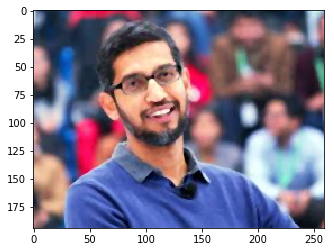

In [9]:
rem_noise = cv2.medianBlur(sp_im,3)
plt.imshow(cv2.cvtColor(rem_noise, cv2.COLOR_BGR2RGB))